# Recurrent Neural Networks (RNNs)

## Introduction

Recurrent Neural Networks (RNNs) are a class of artificial neural networks designed for processing sequential data. Unlike traditional feedforward neural networks, RNNs have connections that form directed cycles, allowing information to persist and be reused across different time steps.

---

## Key Concepts

- **Sequential Data:** RNNs are ideal for tasks where data is ordered, such as time series, natural language, and audio.
- **Memory:** RNNs maintain a hidden state that acts as memory, capturing information about previous elements in the sequence.
- **Weights Sharing:** The same set of weights is applied at each time step, making RNNs efficient for variable-length sequences.

---

## Architecture

At each time step \( t \), the RNN receives an input \( x_t \) and the previous hidden state \( h_{t-1} \), and computes the new hidden state \( h_t \):

\[
h_t = f(W_{xh} x_t + W_{hh} h_{t-1} + b_h)
\]

Where:
- \( W_{xh} \): Input-to-hidden weights
- \( W_{hh} \): Hidden-to-hidden weights
- \( b_h \): Bias term
- \( f \): Activation function (usually tanh or ReLU)

The output \( y_t \) can be computed as:

\[
y_t = g(W_{hy} h_t + b_y)
\]

---

## Types of RNNs

- **Vanilla RNN:** The basic form, as described above.
- **Long Short-Term Memory (LSTM):** Addresses the vanishing gradient problem by introducing gates (input, forget, output) to control information flow.
- **Gated Recurrent Unit (GRU):** A simplified version of LSTM with fewer gates.
- **Bidirectional RNN:** Processes data in both forward and backward directions for improved context.

---

## Applications

- **Natural Language Processing:** Language modeling, text generation, machine translation, sentiment analysis.
- **Speech Recognition:** Transcribing audio to text.
- **Time Series Prediction:** Stock prices, weather forecasting.
- **Video Analysis:** Activity recognition, captioning.

---

## Advantages

- Handles variable-length sequences.
- Maintains context through hidden states.
- Suitable for many sequence-based tasks.

---

## Limitations

- **Vanishing/Exploding Gradients:** Makes training difficult for long sequences.
- **Sequential Computation:** Slower training due to dependencies between time steps.
- **Limited Long-Term Memory:** Standard RNNs struggle to capture long-range dependencies.

---

## Improvements

- **LSTM and GRU:** Designed to mitigate vanishing gradient issues.
- **Attention Mechanisms:** Allow the model to focus on relevant parts of the input sequence.
- **Transformers:** Replace recurrence with self-attention for better parallelization and performance.

---

## Summary

RNNs are foundational models for sequential data, enabling tasks that require memory of previous inputs. While they have limitations, advancements like LSTM, GRU, and attention mechanisms have significantly improved their effectiveness in real-world applications.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\Dataset\DailyDelhiClimateTrain.csv", parse_dates=['date'])
df.set_index('date', inplace=True)
# preview the data
print(df.head())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [3]:
# Feature (X) and target (y) variables
features = ['humidity', 'wind_speed', 'meanpressure']
target = 'meantemp'

# Feature scaling
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[features])
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(df[[target]])


In [4]:
# create sequences for LSTM
def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 7
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

print(f"Shape of X_seq: {X_seq.shape}, Shape of y_seq: {y_seq.shape}")
# Split the dataset into training and testing sets

Shape of X_seq: (1455, 7, 3), Shape of y_seq: (1455, 1)


In [5]:
# build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# model summary
model.summary()

c:\Users\Tarun Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,473 (68.25 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_seq, y_seq, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1551
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0329
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0336
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0325
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0311
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0313
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0311
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0316
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0322
Epoch 12/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300
Epoch 13/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0297
Epoch 14/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0296
Epoch 15/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0291
Epoc

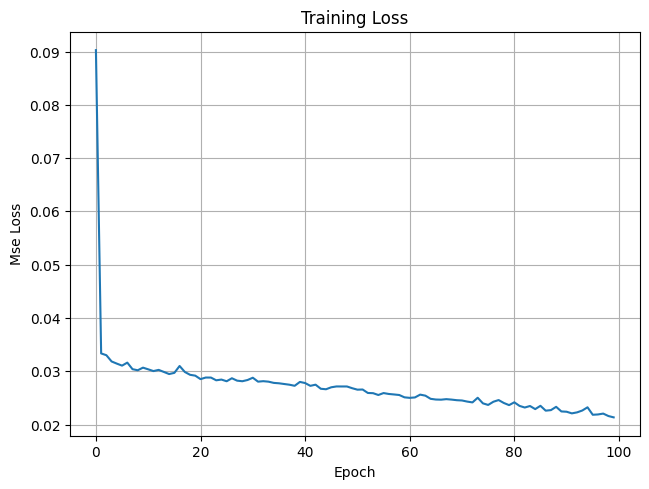

In [7]:
# plot training loss
plt.plot(history.history['loss'])
plt.grid()
plt.title('Training Loss')
plt.tight_layout()
plt.ylabel('Mse Loss')
plt.xlabel('Epoch')
plt.show()


In [8]:
# Make predictions
y_pred_scaled = model.predict(X_seq)

# Inverse transform the predictions and true values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_seq)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


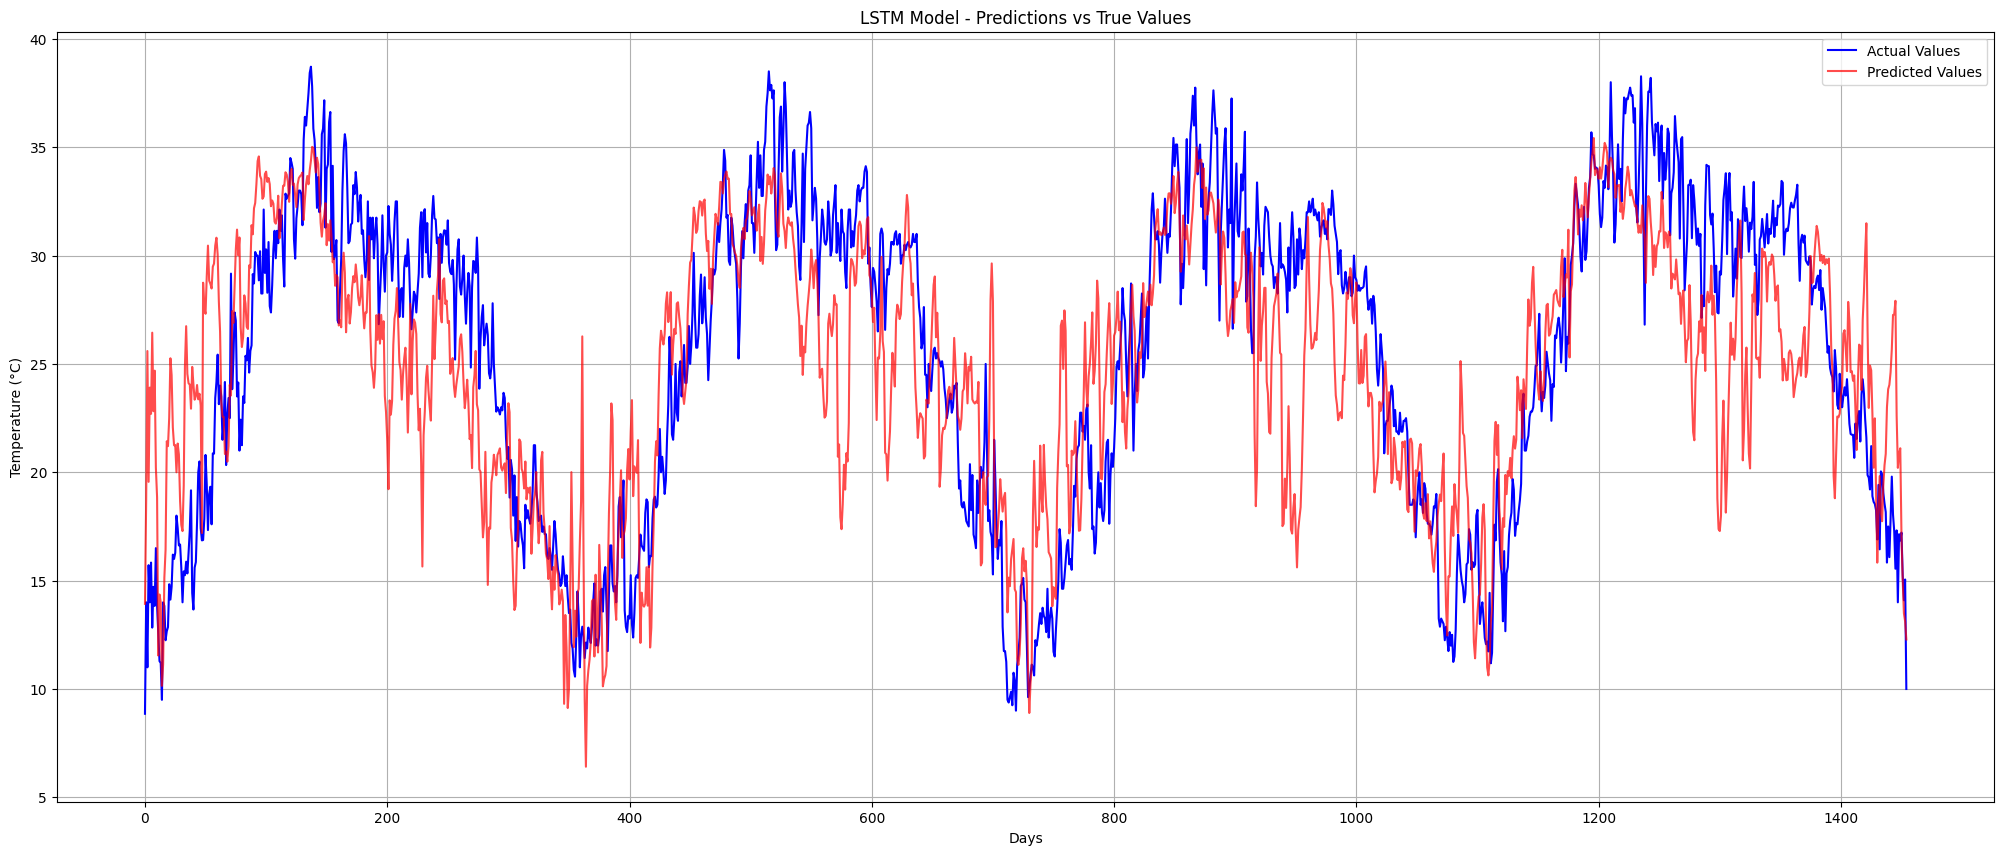

In [9]:
plt.figure(figsize=(25, 10))
# Plot the predictions vs true values
plt.plot(y_true, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red',alpha =0.7)
plt.title('LSTM Model - Predictions vs True Values')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()
plt.show()

In [10]:
def forecast_next_days(model, recent_data, n_future=7):
    forecast = []
    input_seq = recent_data.copy()  # shape: (time_steps, features)

    for _ in range(n_future):
        input_reshaped = input_seq.reshape((1, time_steps, X_seq.shape[2]))
        pred = model.predict(input_reshaped, verbose=0)
        forecast.append(pred[0, 0])

        # For the next step, shift window and append prediction
        next_input = input_seq[-1].copy()
        next_input[0] = pred[0, 0]  # predicted temp (used optionally)
        input_seq = np.vstack((input_seq[1:], next_input))

    forecast = np.array(forecast).reshape(-1, 1)
    return scaler_y.inverse_transform(forecast)

In [11]:
recent_input = X_seq[-1]  # last known 7 days of X
forecast_7_days = forecast_next_days(model, recent_input, n_future=7)

print("Next 7 predicted temperatures (°C):")
for i, temp in enumerate(forecast_7_days.flatten(), start=1):
    print(f"Day {i}: {temp:.2f} °C")

Next 7 predicted temperatures (°C):
Day 1: 12.29 °C
Day 2: 20.27 °C
Day 3: 24.38 °C
Day 4: 24.20 °C
Day 5: 25.10 °C
Day 6: 26.54 °C
Day 7: 26.80 °C


In [12]:
import joblib
# Save the model
joblib.dump(model, r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\RNN_model.h5")

['C:\\Users\\Tarun Singh\\OneDrive\\Desktop\\Green Skill\\RNN_model.h5']